# Topological:
## Metrics:
### Nodes:

In [3]:
import networkx as nx
from M0_Preprcessing import Preprocessing as pp

ModuleNotFoundError: No module named 'M0_Preprcessing'

In [4]:
G = pp.create_network_from_edges("../data/road-euroroad.edges")

NameError: name 'pp' is not defined

In [3]:
G.number_of_nodes()

1174

### Edges:

In [1]:
import networkx as nx
from pyvis.network import Network

# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2 = map(int, line.split())
        G.add_edge(node1, node2)

G.number_of_edges()




1417

### Diameter:

In [11]:
import networkx as nx
from pyvis.network import Network

# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2 = map(int, line.split())
        G.add_edge(node1, node2)

# Compute the diameter for each connected component
for component in nx.connected_components(G):
    subgraph = G.subgraph(component)
    try:
        diameter = nx.diameter(subgraph)
        print(f"Diameter for component {component}: {diameter}")
    except nx.exception.NetworkXError:
        print(f"Error: no path exists in component {component}")

# Print an error message for the not connected parts
if not nx.is_connected(G):
    print("Error: the graph is not connected, so no diameter exists.")


Diameter for component {384, 1, 2, 3, 4, 5, 388, 390, 389, 387, 391, 386, 15, 16, 17, 18, 19, 20, 21, 385, 821, 822, 823, 838, 839, 840, 841, 855, 861, 623, 624, 625, 626, 627, 370, 369, 371, 368, 383}: 16
Diameter for component {6, 7, 8, 9, 10, 11, 12, 13, 14, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 

### Relation between nodes and edges:

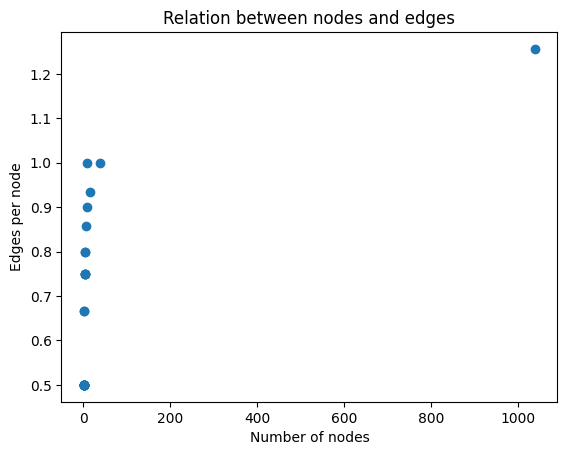

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2 = map(int, line.split())
        G.add_edge(node1, node2)

# Compute the relation between nodes and edges for each connected component
x_values = []
y_values = []
for component in nx.connected_components(G):
    subgraph = G.subgraph(component)
    num_nodes = subgraph.number_of_nodes()
    num_edges = subgraph.number_of_edges()
    relation = num_edges / num_nodes
    x_values.append(num_nodes)
    y_values.append(relation)

# Plot the results
plt.scatter(x_values, y_values)
plt.title("Relation between nodes and edges")
plt.xlabel("Number of nodes")
plt.ylabel("Edges per node")
plt.show()




### Length metrics:
#### Average Path Length:

Average path length for connected components:
Component 1: 6.35
Component 2: 18.40
Component 3: 1.33
Component 4: 1.50
Component 5: 2.29
Component 6: 2.00
Component 7: 1.00
Component 8: 4.34
Component 9: 1.33
Component 10: 1.67
Component 11: 2.00
Component 12: 1.67
Component 13: 1.67
Component 14: 1.00
Component 15: 1.00
Component 16: 1.00
Component 17: 1.00
Component 18: 2.67
Component 19: 1.00
Component 20: 1.00
Component 21: 1.00
Component 22: 3.67
Component 23: 1.00
Component 24: 1.00
Component 25: 1.00
Component 26: 1.00
Overall: 2.42


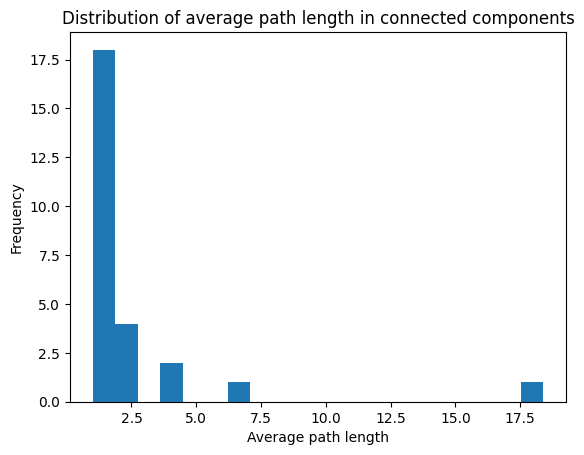

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2 = map(int, line.split())
        G.add_edge(node1, node2)

# Calculate average path length for each connected component
avg_path_lengths = []
for component in nx.connected_components(G):
    subgraph = G.subgraph(component)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    avg_path_lengths.append(avg_path_length)

# Calculate overall average path length
overall_avg_path_length = sum(avg_path_lengths) / len(avg_path_lengths)

# Print results
print("Average path length for connected components:")
for i, avg_path_length in enumerate(avg_path_lengths):
    print(f"Component {i+1}: {avg_path_length:.2f}")
print(f"Overall: {overall_avg_path_length:.2f}")

# Plot results
plt.hist(avg_path_lengths, bins=20)
plt.xlabel("Average path length")
plt.ylabel("Frequency")
plt.title("Distribution of average path length in connected components")
plt.show()




In [3]:
pip install Jinja2

Note: you may need to restart the kernel to use updated packages.


#### Longest path length:

Longest path length for connected components:
Component 1: 16
Component 2: 62
Component 3: 2
Component 4: 2
Component 5: 5
Component 6: 4
Component 7: 1
Component 8: 10
Component 9: 2
Component 10: 3
Component 11: 4
Component 12: 3
Component 13: 3
Component 14: 1
Component 15: 1
Component 16: 1
Component 17: 1
Component 18: 6
Component 19: 1
Component 20: 1
Component 21: 1
Component 22: 9
Component 23: 1
Component 24: 1
Component 25: 1
Component 26: 1
Overall: 62


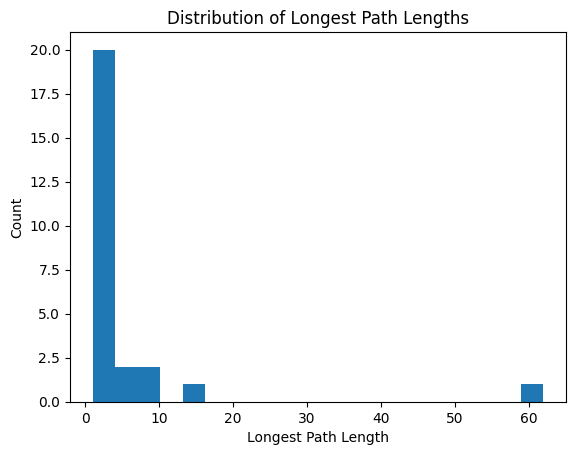

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2 = map(int, line.split())
        G.add_edge(node1, node2)

# Calculate longest path length for each connected component
longest_path_lengths = []
for component in nx.connected_components(G):
    subgraph = G.subgraph(component)
    longest_path_length = nx.diameter(subgraph)
    longest_path_lengths.append(longest_path_length)

# Calculate overall longest path length
overall_longest_path_length = max(longest_path_lengths)

# Print results
print("Longest path length for connected components:")
for i, longest_path_length in enumerate(longest_path_lengths):
    print(f"Component {i+1}: {longest_path_length}")
print(f"Overall: {overall_longest_path_length}")

# Plot histogram of longest path lengths
plt.hist(longest_path_lengths, bins=20)
plt.xlabel("Longest Path Length")
plt.ylabel("Count")
plt.title("Distribution of Longest Path Lengths")
plt.show()



#### Shortest Path Length:

Shortest path length for connected components:
Component 1: 6.350877192982456
Component 2: 18.39514614059391
Component 3: 1.3333333333333333
Component 4: 1.5
Component 5: 2.2857142857142856
Component 6: 2.0
Component 7: 1.0
Component 8: 4.3428571428571425
Component 9: 1.3333333333333333
Component 10: 1.6666666666666667
Component 11: 2.0
Component 12: 1.6666666666666667
Component 13: 1.6666666666666667
Component 14: 1.0
Component 15: 1.0
Component 16: 1.0
Component 17: 1.0
Component 18: 2.6666666666666665
Component 19: 1.0
Component 20: 1.0
Component 21: 1.0
Component 22: 3.6666666666666665
Component 23: 1.0
Component 24: 1.0
Component 25: 1.0
Component 26: 1.0
Overall: 2.4182536446979914


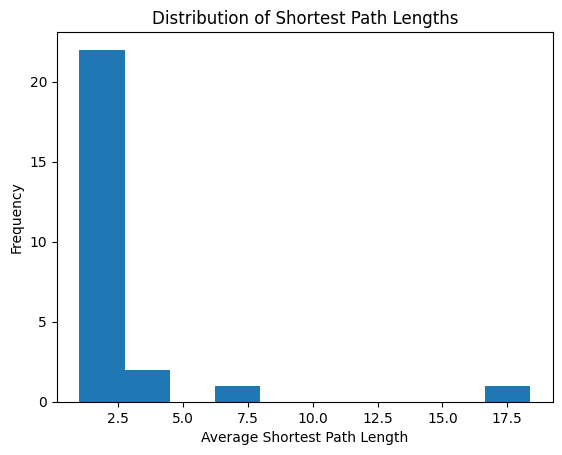

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2 = map(int, line.split())
        G.add_edge(node1, node2)

# Calculate shortest path length for each connected component
shortest_path_lengths = []
for component in nx.connected_components(G):
    subgraph = G.subgraph(component)
    shortest_path_length = nx.average_shortest_path_length(subgraph)
    shortest_path_lengths.append(shortest_path_length)

# Calculate overall shortest path length
overall_shortest_path_length = sum(shortest_path_lengths) / len(shortest_path_lengths)

# Print results
print("Shortest path length for connected components:")
for i, shortest_path_length in enumerate(shortest_path_lengths):
    print(f"Component {i+1}: {shortest_path_length}")
print(f"Overall: {overall_shortest_path_length}")

# Plot the results
plt.hist(shortest_path_lengths, bins=10)
plt.title("Distribution of Shortest Path Lengths")
plt.xlabel("Average Shortest Path Length")
plt.ylabel("Frequency")
plt.show()






### Eccentricity distribution:

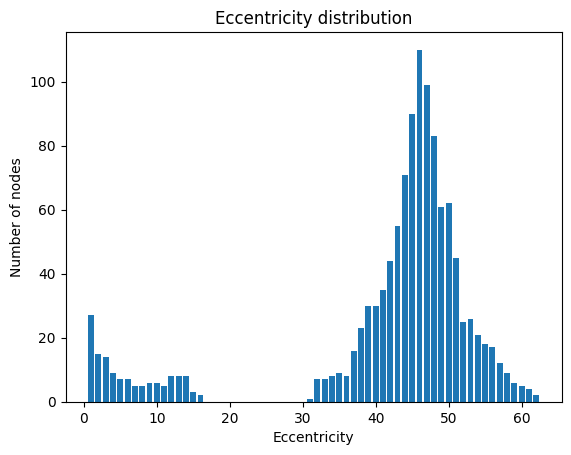

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2 = map(int, line.split())
        G.add_edge(node1, node2)

# Calculate eccentricity distribution for each connected component
eccentricity_counts = {}
for component in nx.connected_components(G):
    component_graph = G.subgraph(component)
    eccentricities = nx.eccentricity(component_graph)
    for eccentricity in eccentricities.values():
        if eccentricity in eccentricity_counts:
            eccentricity_counts[eccentricity] += 1
        else:
            eccentricity_counts[eccentricity] = 1

# Plot the eccentricity distribution
plt.bar(eccentricity_counts.keys(), eccentricity_counts.values())
plt.xlabel("Eccentricity")
plt.ylabel("Number of nodes")
plt.title("Eccentricity distribution")
plt.show()


### community structure:

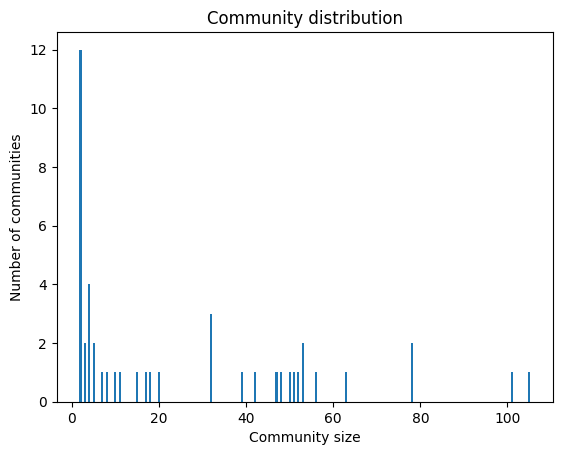

In [8]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from matplotlib import pyplot as plt
from pyvis.network import Network

# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2 = map(int, line.split())
        G.add_edge(node1, node2)

# Calculate community distribution
communities = greedy_modularity_communities(G)
community_counts = {}
for community in communities:
    size = len(community)
    if size in community_counts:
        community_counts[size] += 1
    else:
        community_counts[size] = 1

# Plot community distribution
x = list(community_counts.keys())
y = list(community_counts.values())

plt.bar(x, y, width=0.5, align='center')
plt.xlabel('Community size')
plt.ylabel('Number of communities')
plt.title('Community distribution')
plt.show()


### Centrality metrics:
#### Degree Centrality:

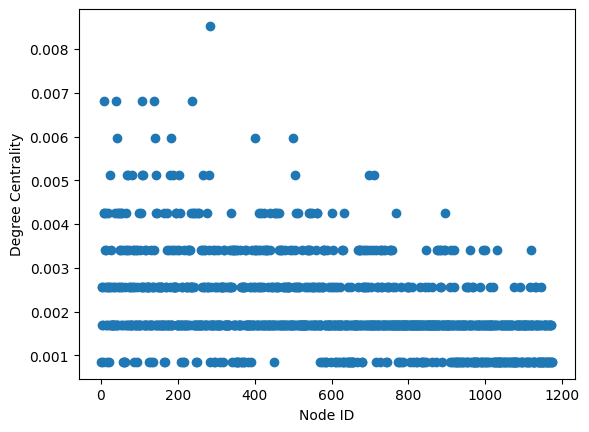

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2 = map(int, line.split())
        G.add_edge(node1, node2)

# Calculate degree centrality for each node
degree_centrality = nx.degree_centrality(G)

# Extract degree centralities and nodes
nodes = degree_centrality.keys()
centralities = degree_centrality.values()

# Plot the degree centrality as a scatter plot
plt.scatter(nodes, centralities)
plt.xlabel("Node ID")
plt.ylabel("Degree Centrality")
plt.show()



#### Betweenness Centrality:

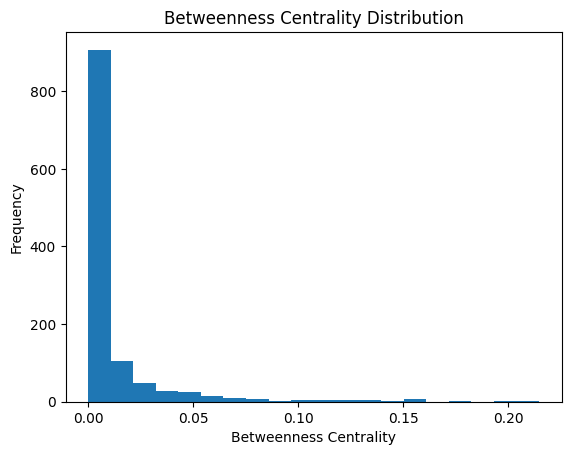

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2 = map(int, line.split())
        G.add_edge(node1, node2)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Plot the betweenness centrality distribution
plt.hist(list(betweenness_centrality.values()), bins=20)
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")
plt.title("Betweenness Centrality Distribution")
plt.show()


#### Closeness Centrality:

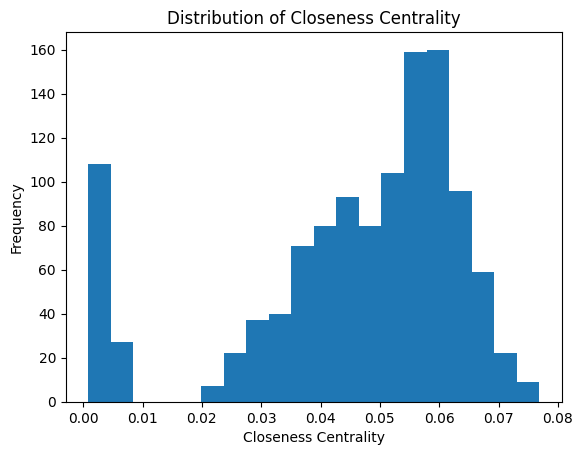

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2 = map(int, line.split())
        G.add_edge(node1, node2)

# Compute the closeness centrality for each node
closeness_centrality = nx.closeness_centrality(G)

# Plot the distribution of closeness centrality
plt.hist(list(closeness_centrality.values()), bins=20)
plt.title("Distribution of Closeness Centrality")
plt.xlabel("Closeness Centrality")
plt.ylabel("Frequency")
plt.show()


#### Straightness centrality:

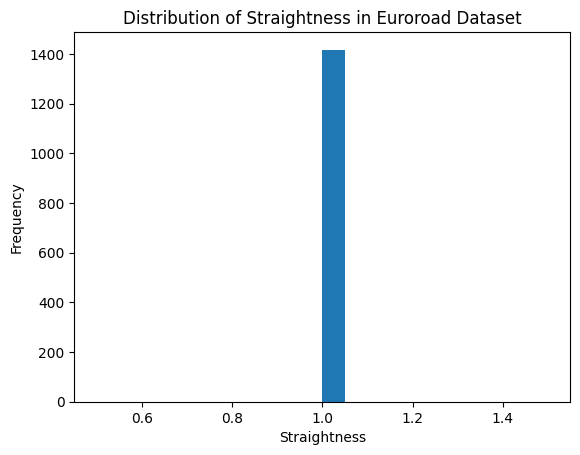

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2 = map(int, line.split())
        G.add_edge(node1, node2)

# Calculate shortest paths for each pair of nodes
shortest_paths = dict(nx.all_pairs_shortest_path_length(G))

# Calculate actual distance and straightness for each edge
distances = []
straightness = []
for edge in G.edges():
    node1, node2 = edge
    actual_distance = nx.dijkstra_path_length(G, node1, node2)
    shortest_distance = shortest_paths[node1][node2]
    distances.append(actual_distance)
    straightness.append(shortest_distance/actual_distance)

# Plot the results
plt.hist(straightness, bins=20)
plt.xlabel("Straightness")
plt.ylabel("Frequency")
plt.title("Distribution of Straightness in Euroroad Dataset")
plt.show()


### Map and Centrality measures:

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2 = map(int, line.split())
        G.add_edge(node1, node2)

# Check whether the graph is connected
if not nx.is_connected(G):
    print("The graph is not connected. Map measures cannot be computed.")
else:
    # Compute and print map measures
    print("Diameter: {}".format(nx.diameter(G)))
    print("Average Shortest Path Length: {}".format(nx.average_shortest_path_length(G)))
    print("Radius: {}".format(nx.radius(G)))

    # Compute and plot centrality measures
    centrality = nx.degree_centrality(G)
    plt.hist(centrality.values())
    plt.title("Degree Centrality Histogram")
    plt.xlabel("Degree Centrality")
    plt.ylabel("Frequency")
    plt.show()


The graph is not connected. Map measures cannot be computed.


### Degree metrics:
#### Degree Distribution:


Connected Component 1:
Number of Nodes: 39
Number of Edges: 39
Diameter: 16
Average Shortest Path Length: 6.350877192982456
Radius: 8
Center Nodes: [626]
Periphery Nodes: [838, 383]
Degree Centrality: {384: 0.05263157894736842, 1: 0.02631578947368421, 2: 0.07894736842105263, 3: 0.05263157894736842, 4: 0.07894736842105263, 5: 0.02631578947368421, 388: 0.05263157894736842, 390: 0.07894736842105263, 389: 0.07894736842105263, 387: 0.05263157894736842, 391: 0.02631578947368421, 386: 0.05263157894736842, 15: 0.02631578947368421, 16: 0.05263157894736842, 17: 0.07894736842105263, 18: 0.07894736842105263, 19: 0.13157894736842105, 20: 0.05263157894736842, 21: 0.02631578947368421, 385: 0.05263157894736842, 821: 0.02631578947368421, 822: 0.05263157894736842, 823: 0.05263157894736842, 838: 0.02631578947368421, 839: 0.05263157894736842, 840: 0.05263157894736842, 841: 0.02631578947368421, 855: 0.05263157894736842, 861: 0.02631578947368421, 623: 0.07894736842105263, 624: 0.05263157894736842, 625: 0.0

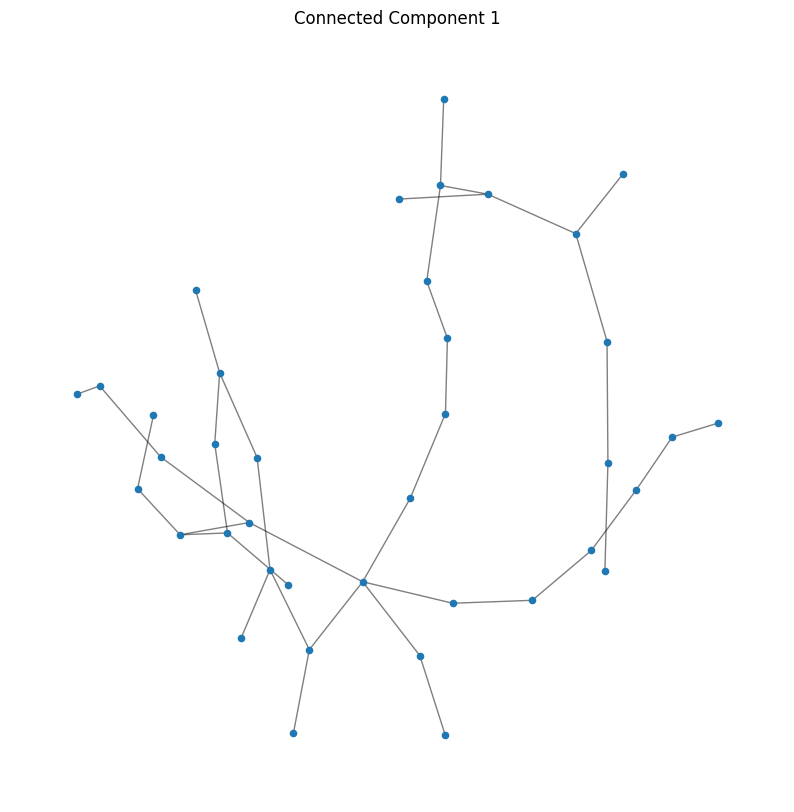


Connected Component 2:
Number of Nodes: 1039
Number of Edges: 1305
Diameter: 62
Average Shortest Path Length: 18.39514614059391
Radius: 31
Center Nodes: [228]
Periphery Nodes: [657, 1172]
Degree Centrality: {6: 0.0019267822736030828, 7: 0.007707129094412331, 880: 0.0019267822736030828, 8: 0.004816955684007707, 22: 0.002890173410404624, 23: 0.005780346820809248, 411: 0.004816955684007707, 453: 0.004816955684007707, 454: 0.004816955684007707, 889: 0.0019267822736030828, 9: 0.004816955684007707, 479: 0.0038535645472061657, 480: 0.0019267822736030828, 561: 0.004816955684007707, 10: 0.0038535645472061657, 537: 0.0038535645472061657, 1074: 0.002890173410404624, 11: 0.002890173410404624, 536: 0.002890173410404624, 12: 0.004816955684007707, 560: 0.0019267822736030828, 13: 0.0038535645472061657, 27: 0.0038535645472061657, 30: 0.002890173410404624, 559: 0.0038535645472061657, 14: 0.0019267822736030828, 596: 0.0019267822736030828, 1138: 0.0019267822736030828, 34: 0.002890173410404624, 409: 0.003

Closeness Centrality: {6: 0.07291886195995785, 7: 0.07850552110119498, 880: 0.06856916369401506, 8: 0.07503252855284083, 22: 0.07312949133436664, 23: 0.07431803536908427, 411: 0.07454754380925022, 453: 0.08066521603978863, 454: 0.07398431931575196, 889: 0.07438727246667622, 9: 0.07121783876500858, 479: 0.07609970674486803, 480: 0.06999797693708275, 561: 0.07240008369951872, 10: 0.06784757173671482, 537: 0.07006885378695828, 1074: 0.06654699320425696, 11: 0.06384156467187403, 536: 0.06366535819430814, 12: 0.06389658356417359, 560: 0.06017042490290418, 13: 0.060125115848007414, 27: 0.06788750817527796, 30: 0.06009378799282117, 559: 0.06022628372497824, 14: 0.056749220928325406, 596: 0.056730611575668145, 1138: 0.05672441117000929, 34: 0.053732270421368675, 409: 0.0691262653169952, 885: 0.07586055689541767, 24: 0.06955705957247202, 538: 0.07198335644937587, 1078: 0.06918155158624367, 1109: 0.06919077456339155, 25: 0.06569204480729068, 1110: 0.06750780437044746, 26: 0.06368879617130936, 28

Betweenness Centrality: {6: 0.001635135862746897, 7: 0.184287830323691, 880: 5.579782267203185e-05, 8: 0.12284943116381679, 22: 0.010025397427568729, 23: 0.02958008909256185, 411: 0.050088530024603894, 453: 0.2236479464534615, 454: 0.0366229622989014, 889: 0.041170713711049196, 9: 0.015317931574628307, 479: 0.04941654118778425, 480: 0.005304690074327958, 561: 0.1286974742242883, 10: 0.018492908417131863, 537: 0.0035291810975483073, 1074: 0.0045498013346576055, 11: 0.002644778982957632, 536: 0.012573807291785343, 12: 0.062208910136605636, 560: 0.00023544486353238505, 13: 0.015267345437680248, 27: 0.06802074357088393, 30: 0.004852258348615671, 559: 0.037433009621914655, 14: 0.006712151362961559, 596: 0.0009511859216611992, 1138: 0.0019267822736030828, 34: 0.0048197427364767564, 409: 0.00915205292939206, 885: 0.02629590327472251, 24: 0.0030395649959551454, 538: 0.022588949884076594, 1078: 0.0, 1109: 0.0019267822736030828, 25: 0.0008759979661915361, 1110: 0.00041119416429653957, 26: 0.0005

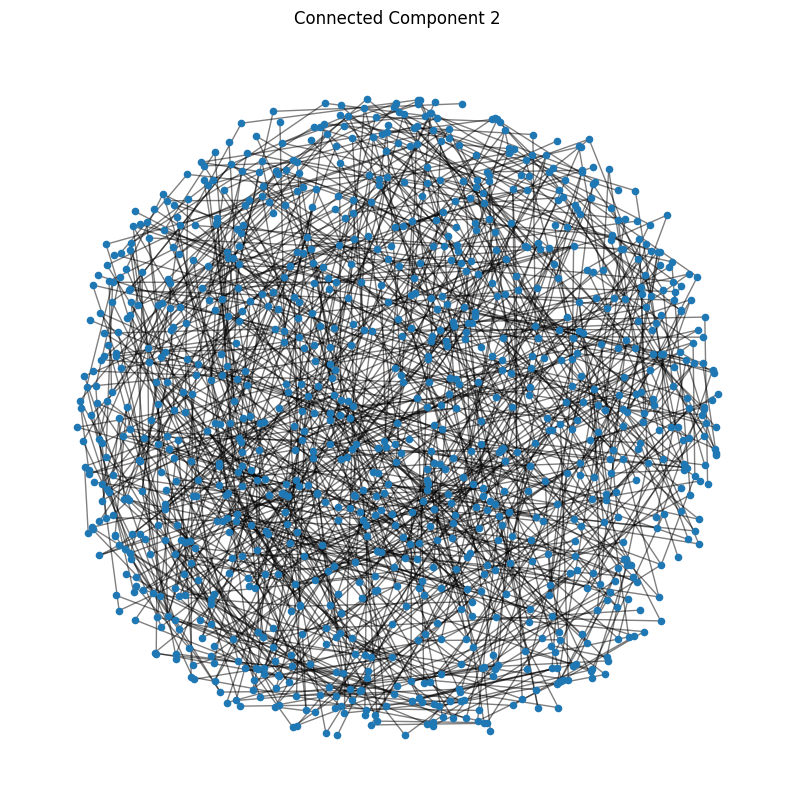


Connected Component 3:
Number of Nodes: 3
Number of Edges: 2
Diameter: 2
Average Shortest Path Length: 1.3333333333333333
Radius: 1
Center Nodes: [59]
Periphery Nodes: [58, 60]
Degree Centrality: {58: 0.5, 59: 1.0, 60: 0.5}
Closeness Centrality: {58: 0.6666666666666666, 59: 1.0, 60: 0.6666666666666666}
Betweenness Centrality: {58: 0.0, 59: 1.0, 60: 0.0}


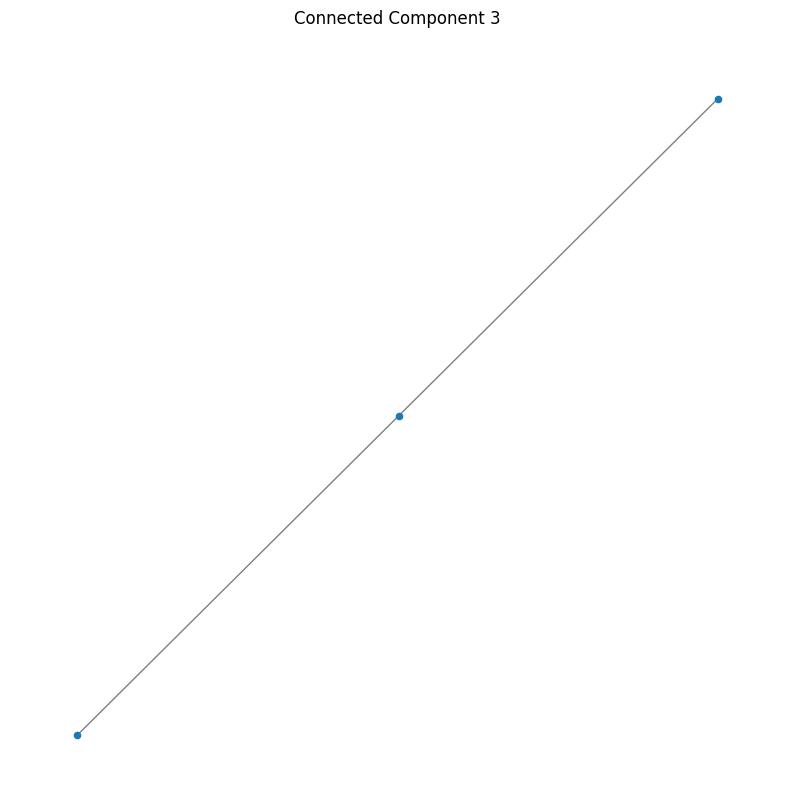


Connected Component 4:
Number of Nodes: 4
Number of Edges: 3
Diameter: 2
Average Shortest Path Length: 1.5
Radius: 1
Center Nodes: [62]
Periphery Nodes: [1144, 61, 63]
Degree Centrality: {1144: 0.3333333333333333, 61: 0.3333333333333333, 62: 1.0, 63: 0.3333333333333333}
Closeness Centrality: {1144: 0.6, 61: 0.6, 62: 1.0, 63: 0.6}
Betweenness Centrality: {1144: 0.0, 61: 0.0, 62: 1.0, 63: 0.0}


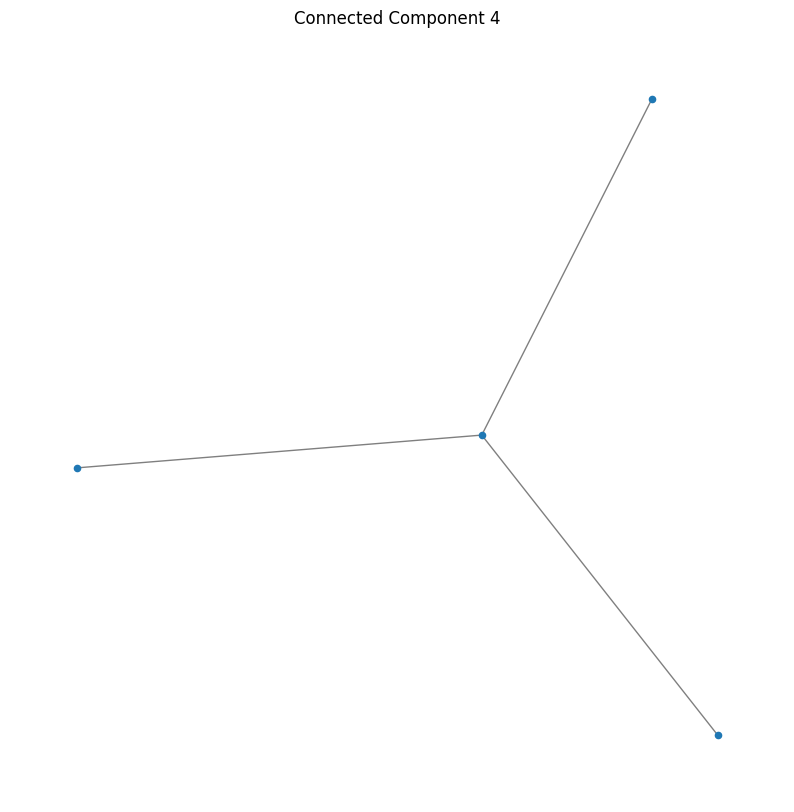


Connected Component 5:
Number of Nodes: 8
Number of Edges: 8
Diameter: 5
Average Shortest Path Length: 2.2857142857142856
Radius: 3
Center Nodes: [125, 126, 127]
Periphery Nodes: [1160, 572]
Degree Centrality: {128: 0.2857142857142857, 573: 0.2857142857142857, 1160: 0.14285714285714285, 1161: 0.2857142857142857, 572: 0.2857142857142857, 125: 0.2857142857142857, 126: 0.42857142857142855, 127: 0.2857142857142857}
Closeness Centrality: {128: 0.4375, 573: 0.4375, 1160: 0.3181818181818182, 1161: 0.4375, 572: 0.3888888888888889, 125: 0.5, 126: 0.5833333333333334, 127: 0.5}
Betweenness Centrality: {128: 0.14285714285714285, 573: 0.14285714285714285, 1160: 0.0, 1161: 0.2857142857142857, 572: 0.09523809523809523, 125: 0.23809523809523808, 126: 0.5714285714285714, 127: 0.23809523809523808}


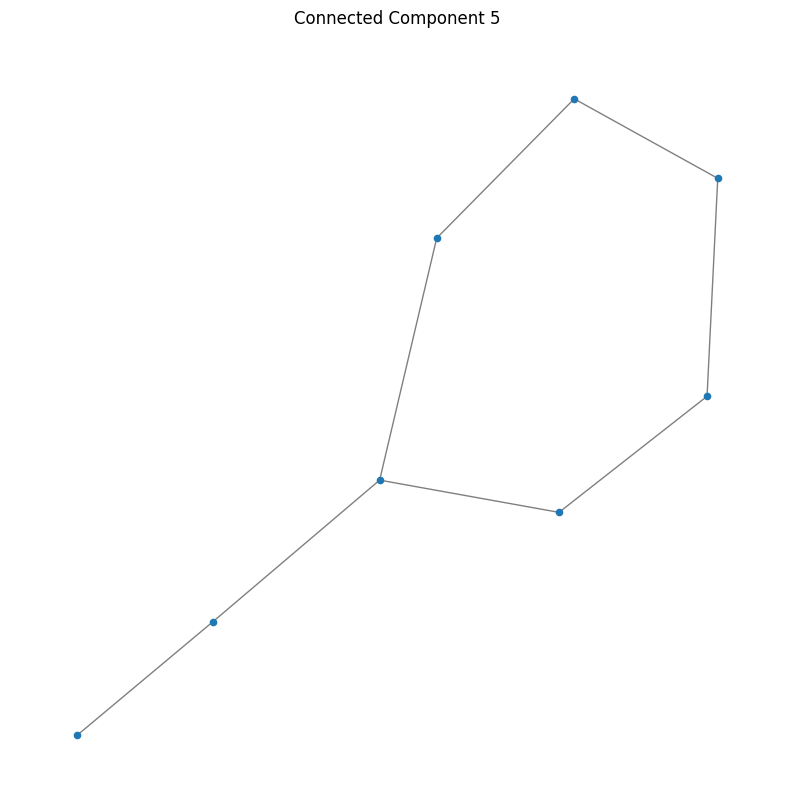


Connected Component 6:
Number of Nodes: 5
Number of Edges: 4
Diameter: 4
Average Shortest Path Length: 2.0
Radius: 2
Center Nodes: [249]
Periphery Nodes: [213, 251]
Degree Centrality: {213: 0.25, 214: 0.5, 249: 0.5, 250: 0.5, 251: 0.25}
Closeness Centrality: {213: 0.4, 214: 0.5714285714285714, 249: 0.6666666666666666, 250: 0.5714285714285714, 251: 0.4}
Betweenness Centrality: {213: 0.0, 214: 0.5, 249: 0.6666666666666666, 250: 0.5, 251: 0.0}


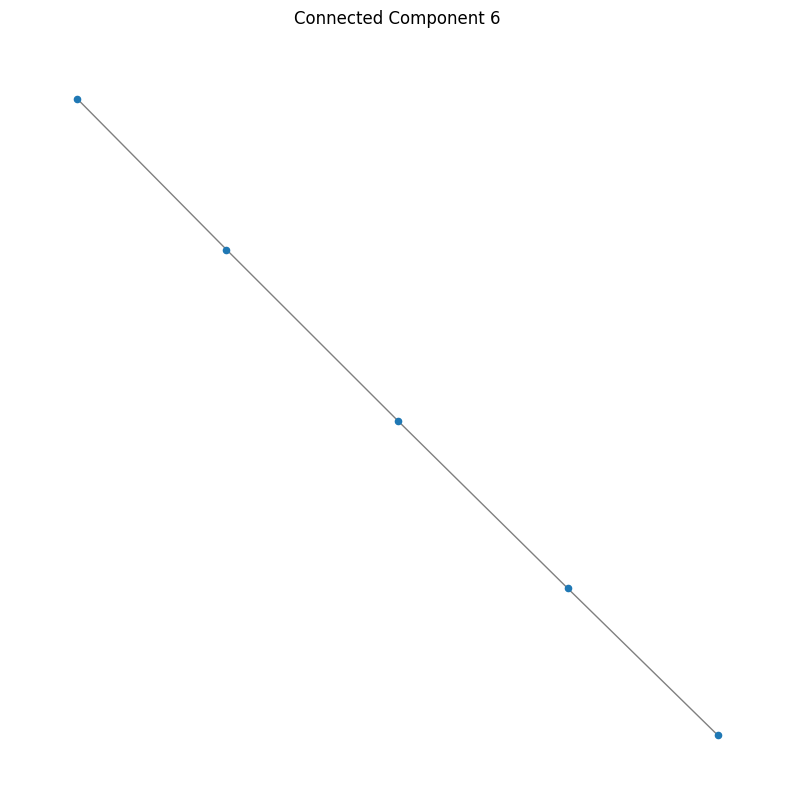


Connected Component 7:
Number of Nodes: 2
Number of Edges: 1
Diameter: 1
Average Shortest Path Length: 1.0
Radius: 1
Center Nodes: [355, 356]
Periphery Nodes: [355, 356]
Degree Centrality: {355: 1.0, 356: 1.0}
Closeness Centrality: {355: 1.0, 356: 1.0}
Betweenness Centrality: {355: 0.0, 356: 0.0}


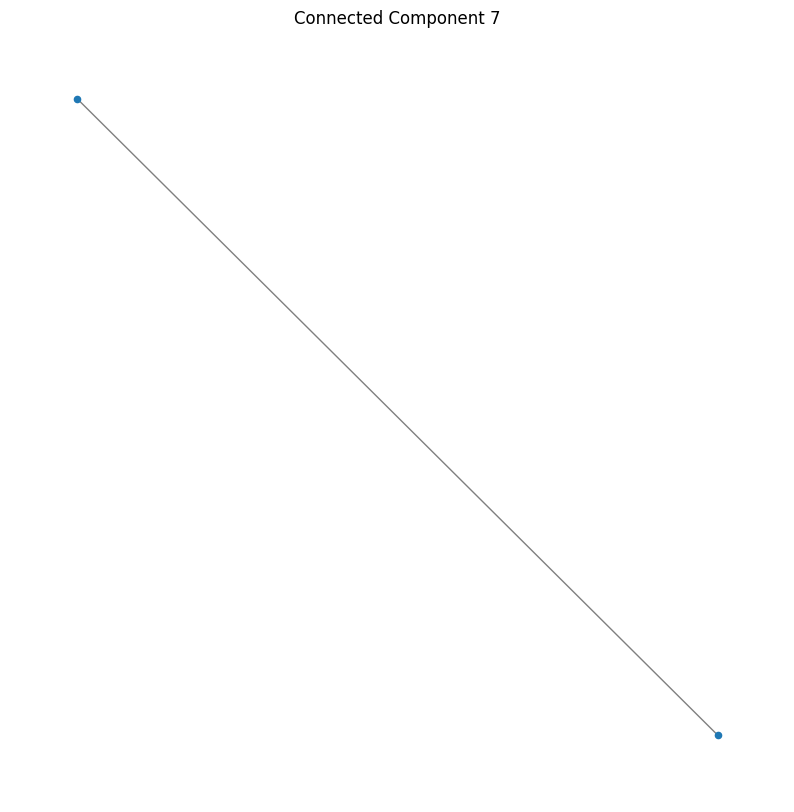


Connected Component 8:
Number of Nodes: 15
Number of Edges: 14
Diameter: 10
Average Shortest Path Length: 4.3428571428571425
Radius: 5
Center Nodes: [367]
Periphery Nodes: [586, 812, 820, 986]
Degree Centrality: {586: 0.07142857142857142, 587: 0.2857142857142857, 588: 0.14285714285714285, 365: 0.07142857142857142, 590: 0.14285714285714285, 366: 0.14285714285714285, 367: 0.21428571428571427, 589: 0.14285714285714285, 812: 0.07142857142857142, 820: 0.07142857142857142, 986: 0.07142857142857142, 379: 0.14285714285714285, 380: 0.14285714285714285, 381: 0.14285714285714285, 382: 0.14285714285714285}
Closeness Centrality: {586: 0.19444444444444445, 587: 0.23728813559322035, 588: 0.2692307692307692, 365: 0.208955223880597, 590: 0.3181818181818182, 366: 0.25925925925925924, 367: 0.32558139534883723, 589: 0.2978723404255319, 812: 0.19444444444444445, 820: 0.19444444444444445, 986: 0.1590909090909091, 379: 0.18666666666666668, 380: 0.21875, 381: 0.2545454545454545, 382: 0.2916666666666667}
Betw

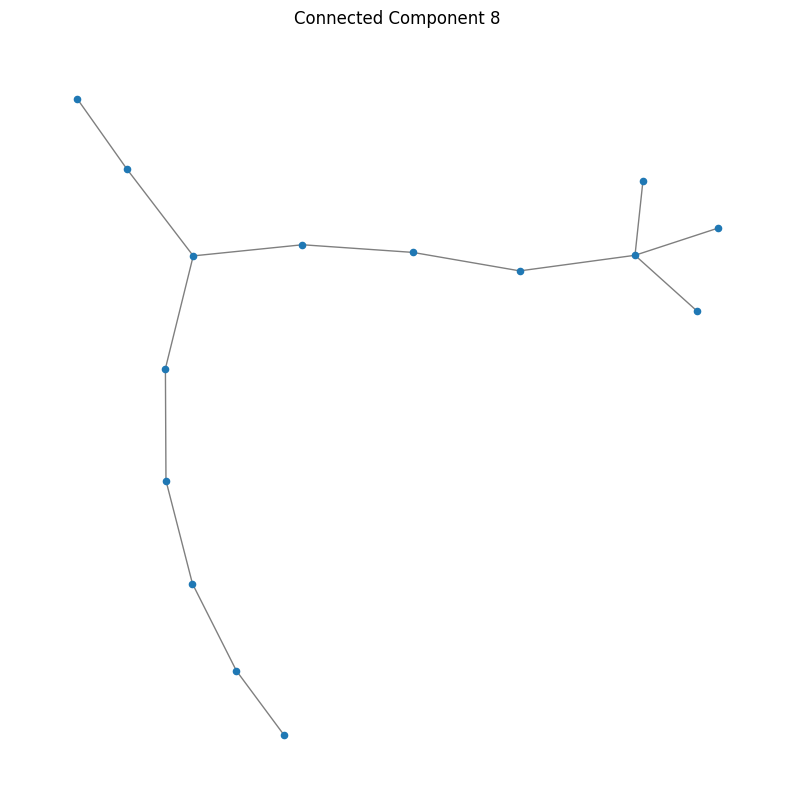


Connected Component 9:
Number of Nodes: 3
Number of Edges: 2
Diameter: 2
Average Shortest Path Length: 1.3333333333333333
Radius: 1
Center Nodes: [647]
Periphery Nodes: [648, 646]
Degree Centrality: {648: 0.5, 646: 0.5, 647: 1.0}
Closeness Centrality: {648: 0.6666666666666666, 646: 0.6666666666666666, 647: 1.0}
Betweenness Centrality: {648: 0.0, 646: 0.0, 647: 1.0}


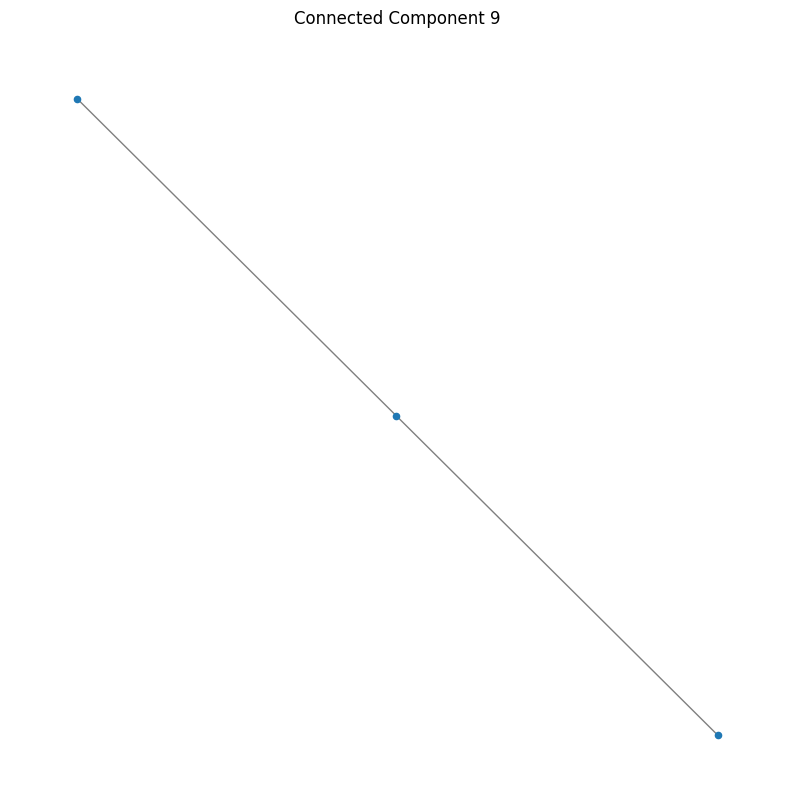


Connected Component 10:
Number of Nodes: 4
Number of Edges: 3
Diameter: 3
Average Shortest Path Length: 1.6666666666666667
Radius: 2
Center Nodes: [654, 655]
Periphery Nodes: [656, 653]
Degree Centrality: {656: 0.3333333333333333, 653: 0.3333333333333333, 654: 0.6666666666666666, 655: 0.6666666666666666}
Closeness Centrality: {656: 0.5, 653: 0.5, 654: 0.75, 655: 0.75}
Betweenness Centrality: {656: 0.0, 653: 0.0, 654: 0.6666666666666666, 655: 0.6666666666666666}


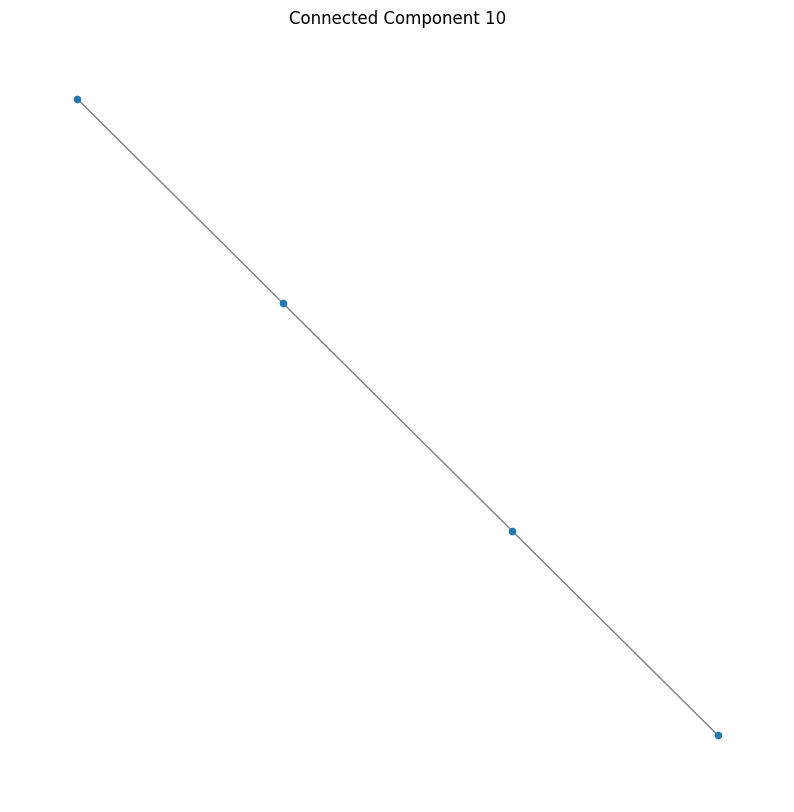


Connected Component 11:
Number of Nodes: 5
Number of Edges: 4
Diameter: 4
Average Shortest Path Length: 2.0
Radius: 2
Center Nodes: [778]
Periphery Nodes: [776, 780]
Degree Centrality: {776: 0.25, 777: 0.5, 778: 0.5, 779: 0.5, 780: 0.25}
Closeness Centrality: {776: 0.4, 777: 0.5714285714285714, 778: 0.6666666666666666, 779: 0.5714285714285714, 780: 0.4}
Betweenness Centrality: {776: 0.0, 777: 0.5, 778: 0.6666666666666666, 779: 0.5, 780: 0.0}


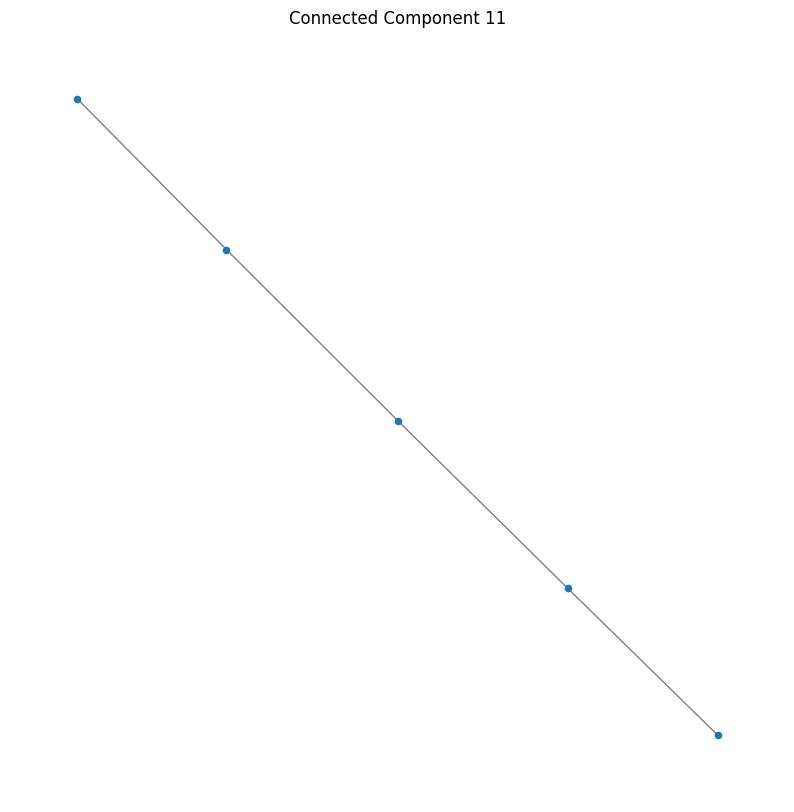


Connected Component 12:
Number of Nodes: 4
Number of Edges: 3
Diameter: 3
Average Shortest Path Length: 1.6666666666666667
Radius: 2
Center Nodes: [925, 926]
Periphery Nodes: [924, 927]
Degree Centrality: {924: 0.3333333333333333, 925: 0.6666666666666666, 926: 0.6666666666666666, 927: 0.3333333333333333}
Closeness Centrality: {924: 0.5, 925: 0.75, 926: 0.75, 927: 0.5}
Betweenness Centrality: {924: 0.0, 925: 0.6666666666666666, 926: 0.6666666666666666, 927: 0.0}


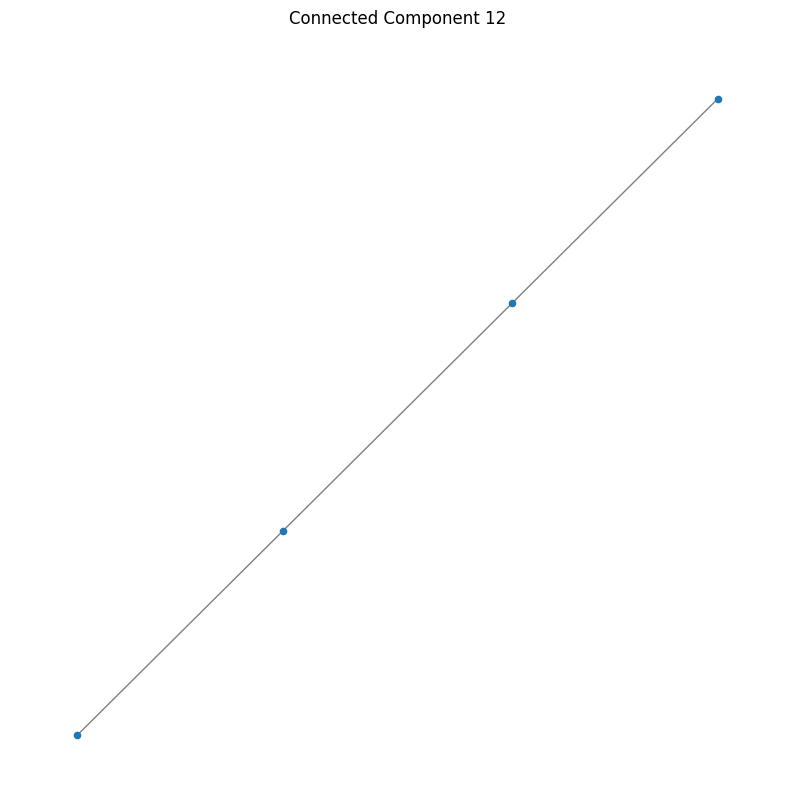


Connected Component 13:
Number of Nodes: 4
Number of Edges: 3
Diameter: 3
Average Shortest Path Length: 1.6666666666666667
Radius: 2
Center Nodes: [939, 940]
Periphery Nodes: [938, 941]
Degree Centrality: {938: 0.3333333333333333, 939: 0.6666666666666666, 940: 0.6666666666666666, 941: 0.3333333333333333}
Closeness Centrality: {938: 0.5, 939: 0.75, 940: 0.75, 941: 0.5}
Betweenness Centrality: {938: 0.0, 939: 0.6666666666666666, 940: 0.6666666666666666, 941: 0.0}


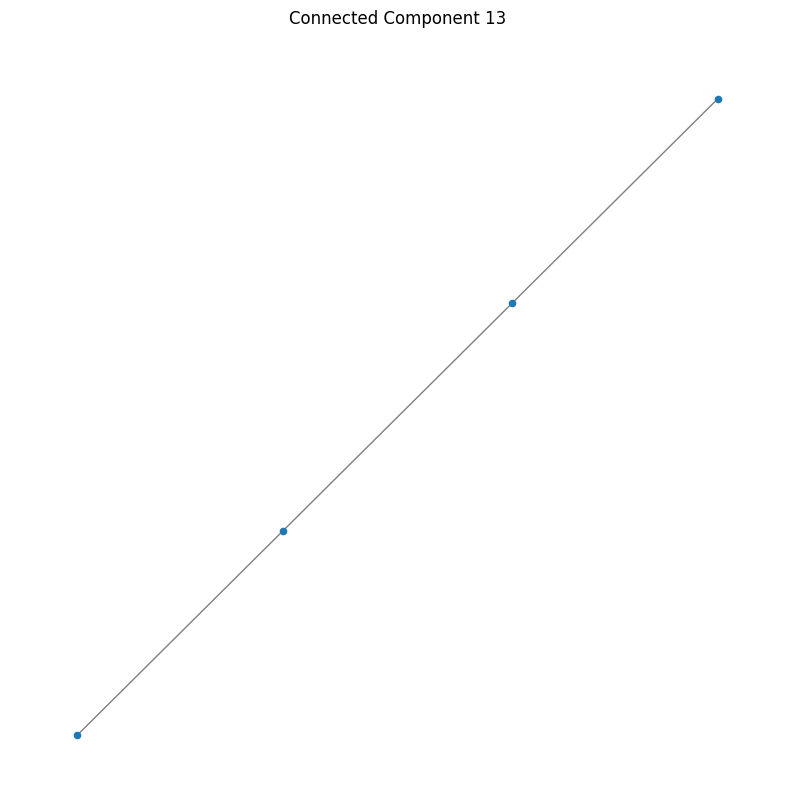


Connected Component 14:
Number of Nodes: 2
Number of Edges: 1
Diameter: 1
Average Shortest Path Length: 1.0
Radius: 1
Center Nodes: [971, 972]
Periphery Nodes: [971, 972]
Degree Centrality: {971: 1.0, 972: 1.0}
Closeness Centrality: {971: 1.0, 972: 1.0}
Betweenness Centrality: {971: 0.0, 972: 0.0}


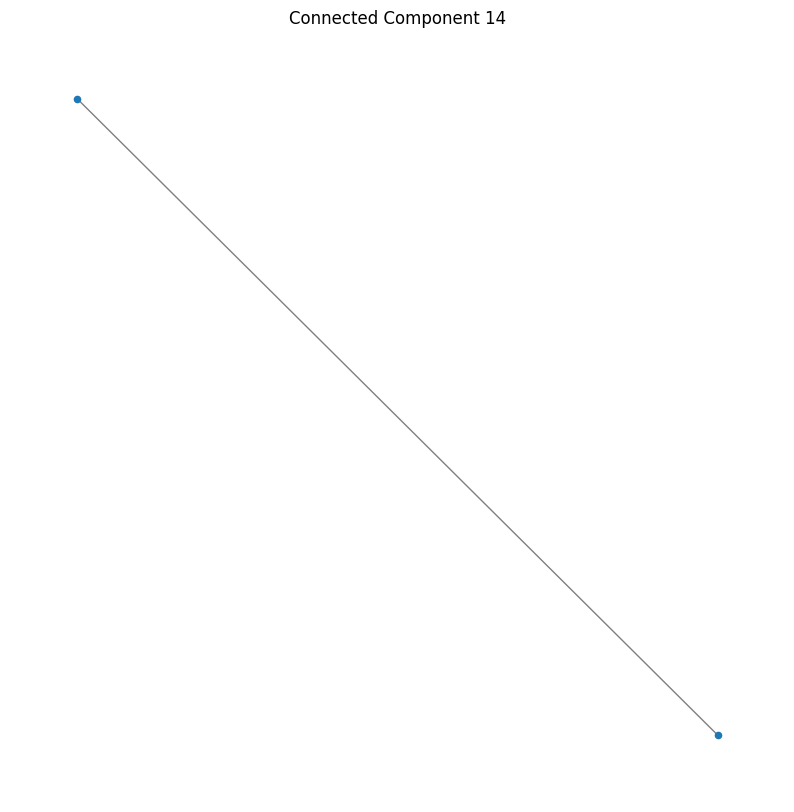


Connected Component 15:
Number of Nodes: 2
Number of Edges: 1
Diameter: 1
Average Shortest Path Length: 1.0
Radius: 1
Center Nodes: [1021, 1022]
Periphery Nodes: [1021, 1022]
Degree Centrality: {1021: 1.0, 1022: 1.0}
Closeness Centrality: {1021: 1.0, 1022: 1.0}
Betweenness Centrality: {1021: 0.0, 1022: 0.0}


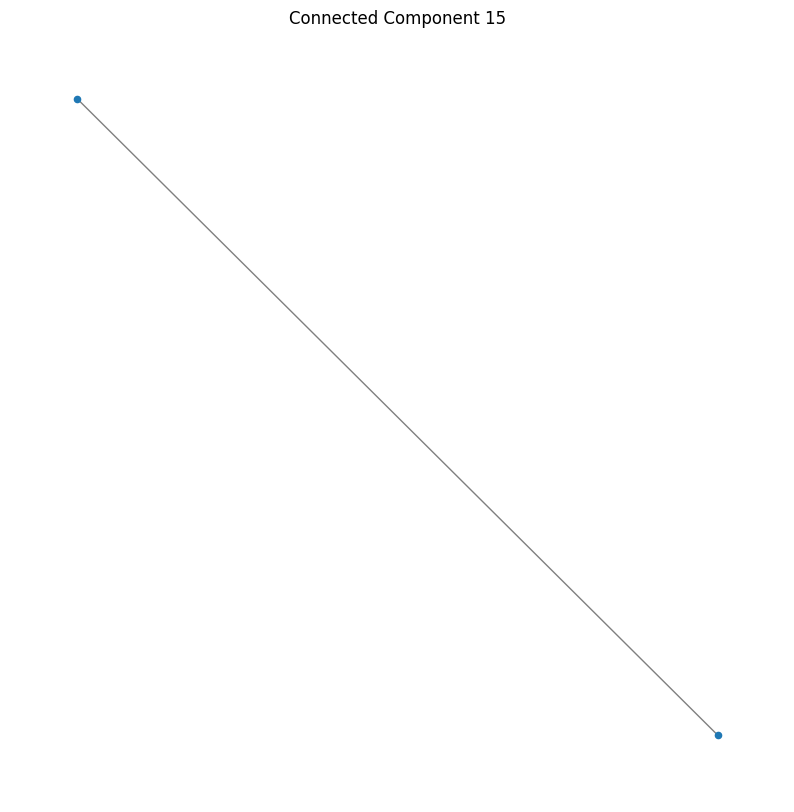


Connected Component 16:
Number of Nodes: 2
Number of Edges: 1
Diameter: 1
Average Shortest Path Length: 1.0
Radius: 1
Center Nodes: [1034, 1035]
Periphery Nodes: [1034, 1035]
Degree Centrality: {1034: 1.0, 1035: 1.0}
Closeness Centrality: {1034: 1.0, 1035: 1.0}
Betweenness Centrality: {1034: 0.0, 1035: 0.0}


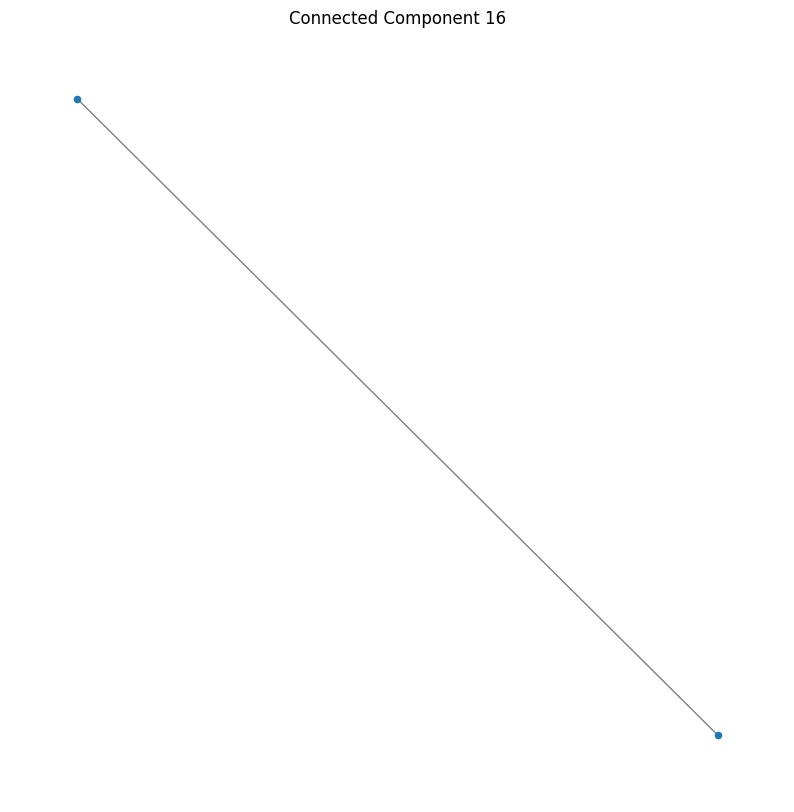


Connected Component 17:
Number of Nodes: 2
Number of Edges: 1
Diameter: 1
Average Shortest Path Length: 1.0
Radius: 1
Center Nodes: [1038, 1039]
Periphery Nodes: [1038, 1039]
Degree Centrality: {1038: 1.0, 1039: 1.0}
Closeness Centrality: {1038: 1.0, 1039: 1.0}
Betweenness Centrality: {1038: 0.0, 1039: 0.0}


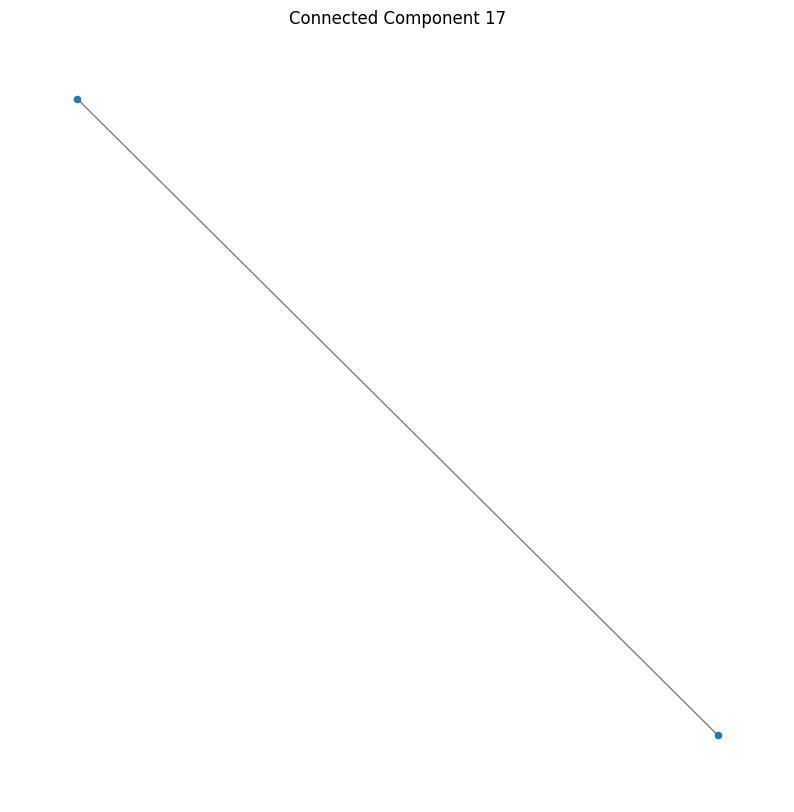


Connected Component 18:
Number of Nodes: 7
Number of Edges: 6
Diameter: 6
Average Shortest Path Length: 2.6666666666666665
Radius: 3
Center Nodes: [1057]
Periphery Nodes: [1060, 1054]
Degree Centrality: {1056: 0.3333333333333333, 1057: 0.3333333333333333, 1058: 0.3333333333333333, 1059: 0.3333333333333333, 1060: 0.16666666666666666, 1054: 0.16666666666666666, 1055: 0.3333333333333333}
Closeness Centrality: {1056: 0.46153846153846156, 1057: 0.5, 1058: 0.46153846153846156, 1059: 0.375, 1060: 0.2857142857142857, 1054: 0.2857142857142857, 1055: 0.375}
Betweenness Centrality: {1056: 0.5333333333333333, 1057: 0.6, 1058: 0.5333333333333333, 1059: 0.3333333333333333, 1060: 0.0, 1054: 0.0, 1055: 0.3333333333333333}


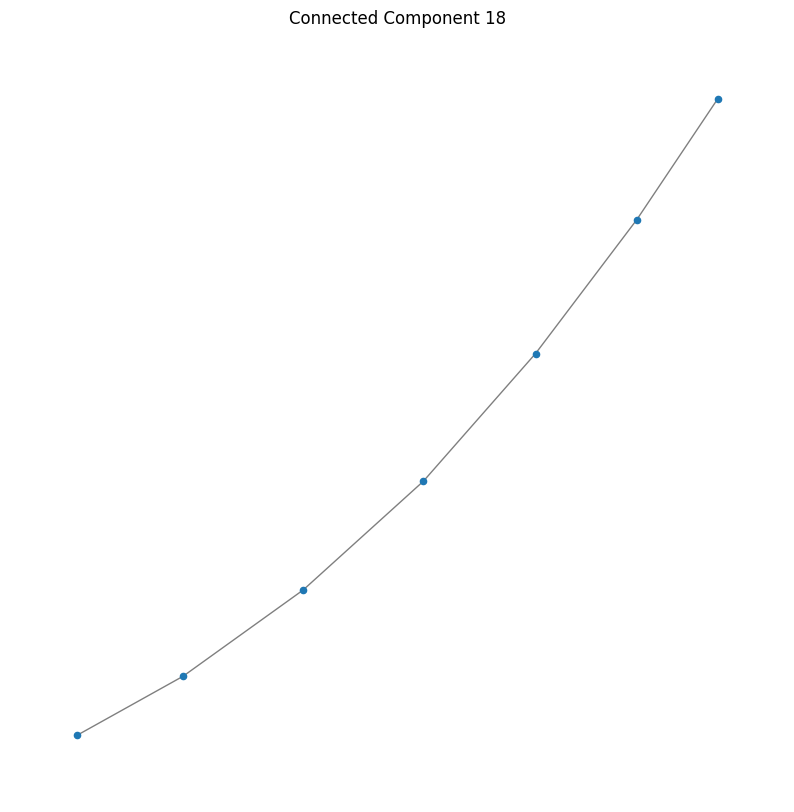


Connected Component 19:
Number of Nodes: 2
Number of Edges: 1
Diameter: 1
Average Shortest Path Length: 1.0
Radius: 1
Center Nodes: [1070, 1071]
Periphery Nodes: [1070, 1071]
Degree Centrality: {1070: 1.0, 1071: 1.0}
Closeness Centrality: {1070: 1.0, 1071: 1.0}
Betweenness Centrality: {1070: 0.0, 1071: 0.0}


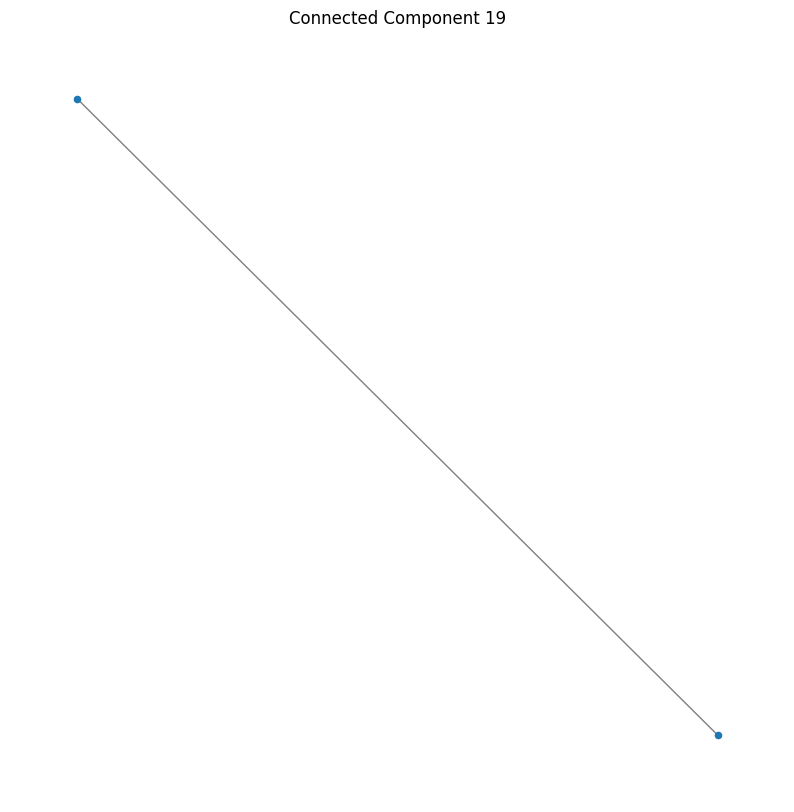


Connected Component 20:
Number of Nodes: 2
Number of Edges: 1
Diameter: 1
Average Shortest Path Length: 1.0
Radius: 1
Center Nodes: [1076, 1077]
Periphery Nodes: [1076, 1077]
Degree Centrality: {1076: 1.0, 1077: 1.0}
Closeness Centrality: {1076: 1.0, 1077: 1.0}
Betweenness Centrality: {1076: 0.0, 1077: 0.0}


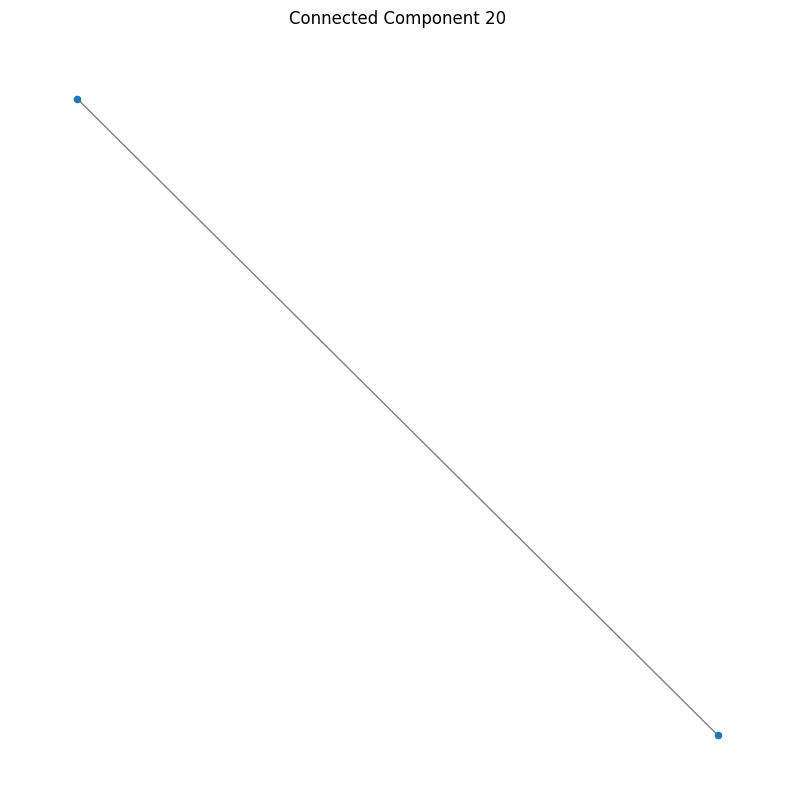


Connected Component 21:
Number of Nodes: 2
Number of Edges: 1
Diameter: 1
Average Shortest Path Length: 1.0
Radius: 1
Center Nodes: [1093, 1094]
Periphery Nodes: [1093, 1094]
Degree Centrality: {1093: 1.0, 1094: 1.0}
Closeness Centrality: {1093: 1.0, 1094: 1.0}
Betweenness Centrality: {1093: 0.0, 1094: 0.0}


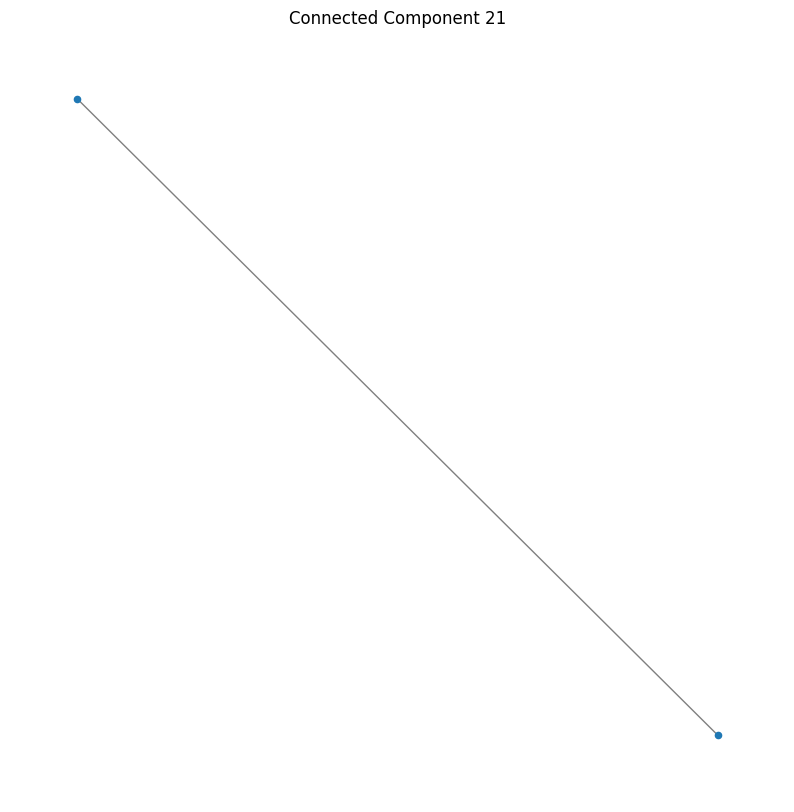


Connected Component 22:
Number of Nodes: 10
Number of Edges: 9
Diameter: 9
Average Shortest Path Length: 3.6666666666666665
Radius: 5
Center Nodes: [1101, 1102]
Periphery Nodes: [1097, 1106]
Degree Centrality: {1097: 0.1111111111111111, 1098: 0.2222222222222222, 1099: 0.2222222222222222, 1100: 0.2222222222222222, 1101: 0.2222222222222222, 1102: 0.2222222222222222, 1103: 0.2222222222222222, 1104: 0.2222222222222222, 1105: 0.2222222222222222, 1106: 0.1111111111111111}
Closeness Centrality: {1097: 0.2, 1098: 0.24324324324324326, 1099: 0.2903225806451613, 1100: 0.3333333333333333, 1101: 0.36, 1102: 0.36, 1103: 0.3333333333333333, 1104: 0.2903225806451613, 1105: 0.24324324324324326, 1106: 0.2}
Betweenness Centrality: {1097: 0.0, 1098: 0.2222222222222222, 1099: 0.38888888888888884, 1100: 0.5, 1101: 0.5555555555555556, 1102: 0.5555555555555556, 1103: 0.5, 1104: 0.38888888888888884, 1105: 0.2222222222222222, 1106: 0.0}


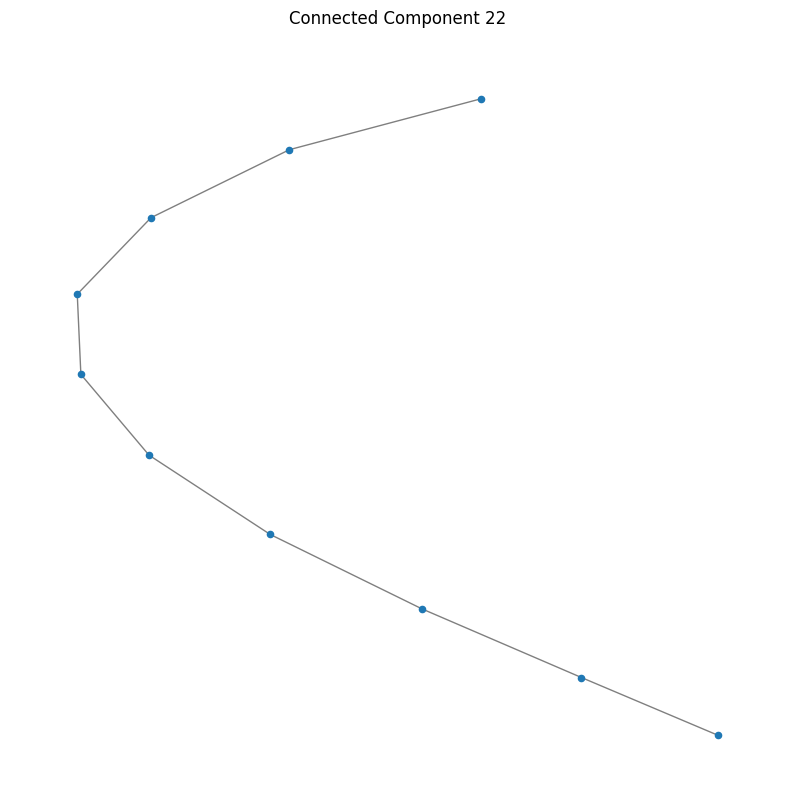


Connected Component 23:
Number of Nodes: 2
Number of Edges: 1
Diameter: 1
Average Shortest Path Length: 1.0
Radius: 1
Center Nodes: [1147, 1148]
Periphery Nodes: [1147, 1148]
Degree Centrality: {1147: 1.0, 1148: 1.0}
Closeness Centrality: {1147: 1.0, 1148: 1.0}
Betweenness Centrality: {1147: 0.0, 1148: 0.0}


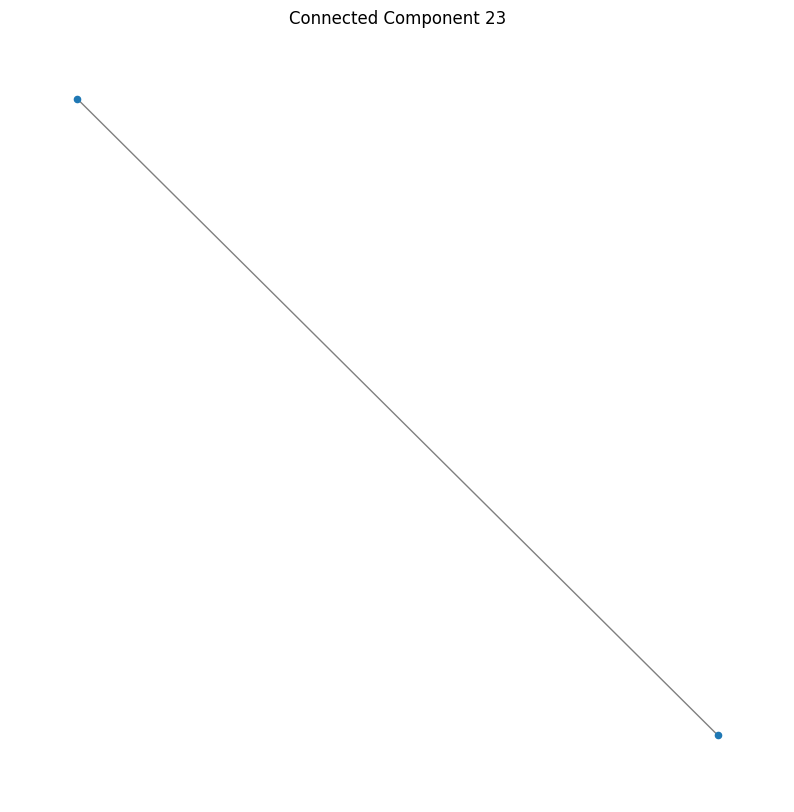


Connected Component 24:
Number of Nodes: 2
Number of Edges: 1
Diameter: 1
Average Shortest Path Length: 1.0
Radius: 1
Center Nodes: [1152, 1151]
Periphery Nodes: [1152, 1151]
Degree Centrality: {1152: 1.0, 1151: 1.0}
Closeness Centrality: {1152: 1.0, 1151: 1.0}
Betweenness Centrality: {1152: 0.0, 1151: 0.0}


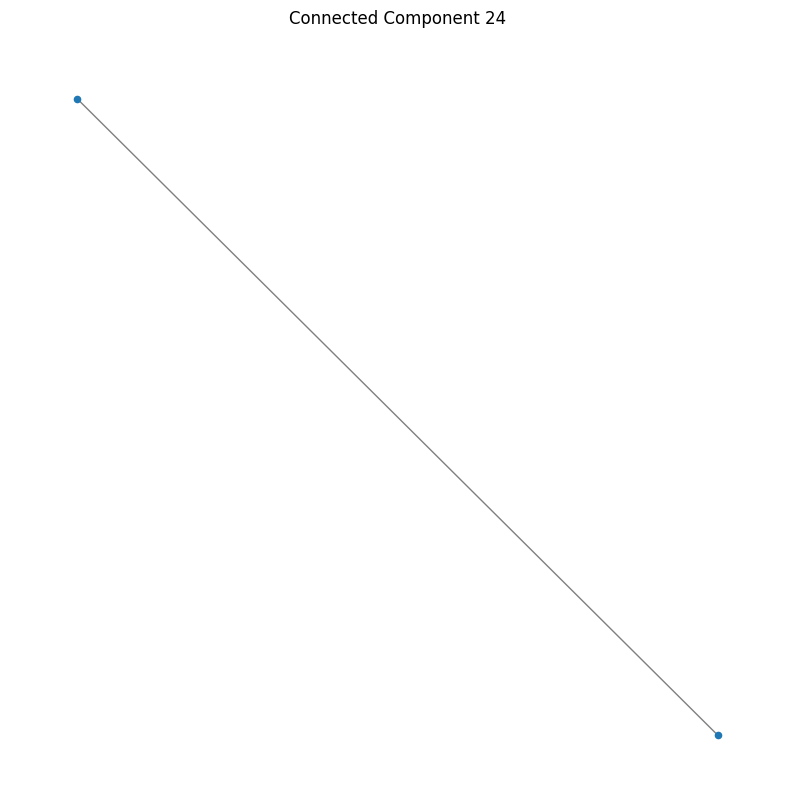


Connected Component 25:
Number of Nodes: 2
Number of Edges: 1
Diameter: 1
Average Shortest Path Length: 1.0
Radius: 1
Center Nodes: [1162, 1163]
Periphery Nodes: [1162, 1163]
Degree Centrality: {1162: 1.0, 1163: 1.0}
Closeness Centrality: {1162: 1.0, 1163: 1.0}
Betweenness Centrality: {1162: 0.0, 1163: 0.0}


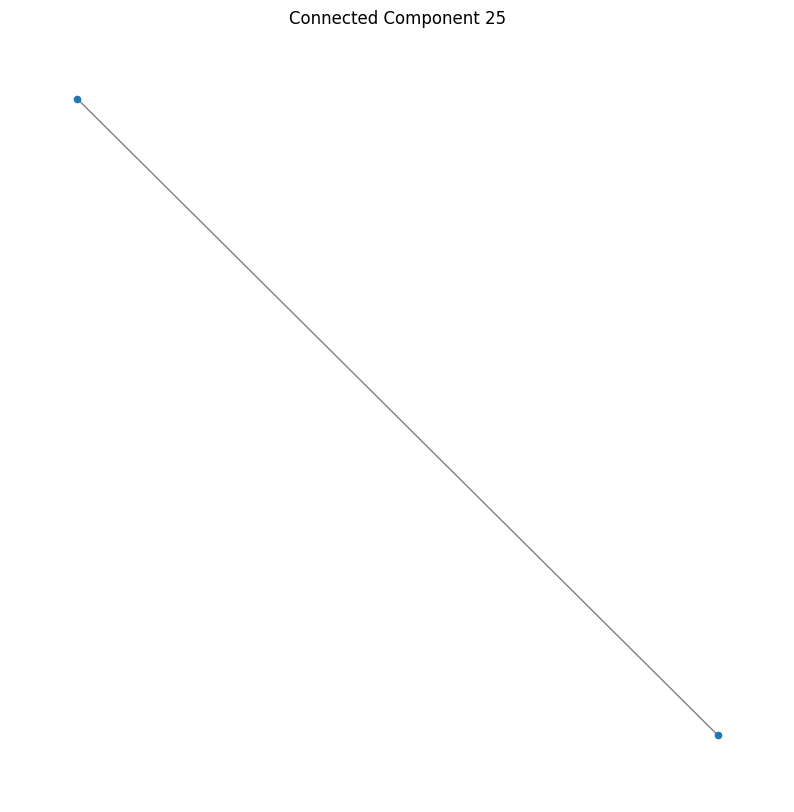


Connected Component 26:
Number of Nodes: 2
Number of Edges: 1
Diameter: 1
Average Shortest Path Length: 1.0
Radius: 1
Center Nodes: [1173, 1174]
Periphery Nodes: [1173, 1174]
Degree Centrality: {1173: 1.0, 1174: 1.0}
Closeness Centrality: {1173: 1.0, 1174: 1.0}
Betweenness Centrality: {1173: 0.0, 1174: 0.0}


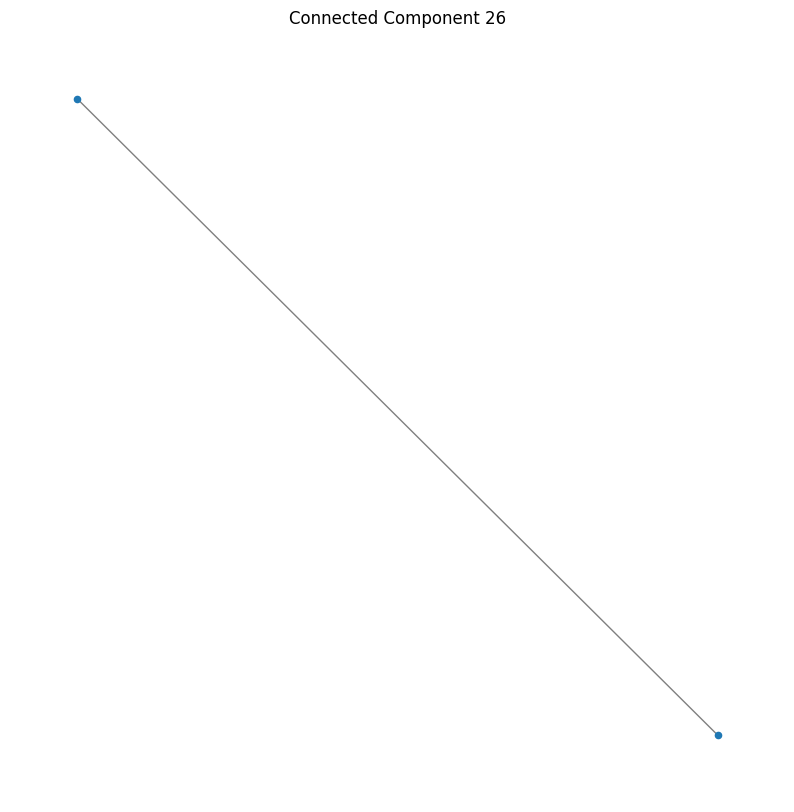

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2 = map(int, line.split())
        G.add_edge(node1, node2)

# Get the connected components
connected_components = list(nx.connected_components(G))

# Compute and print map measures for each connected component
for i, nodes in enumerate(connected_components):
    # Create a subgraph for the connected component
    Gc = G.subgraph(nodes)
    
    print(f"\nConnected Component {i+1}:")
    print("Number of Nodes:", len(Gc.nodes))
    print("Number of Edges:", len(Gc.edges))
    print("Diameter:", nx.diameter(Gc))
    print("Average Shortest Path Length:", nx.average_shortest_path_length(Gc))
    print("Radius:", nx.radius(Gc))
    print("Center Nodes:", nx.center(Gc))
    print("Periphery Nodes:", nx.periphery(Gc))
    print("Degree Centrality:", nx.degree_centrality(Gc))
    print("Closeness Centrality:", nx.closeness_centrality(Gc))
    print("Betweenness Centrality:", nx.betweenness_centrality(Gc))

    # Plot the subgraph
    pos = nx.spring_layout(Gc, k=0.3, seed=42)
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(Gc, pos, node_size=20)
    nx.draw_networkx_edges(Gc, pos, alpha=0.5)
    plt.axis("off")
    plt.title(f"Connected Component {i+1}")
    plt.show()



#### Degree correlation:

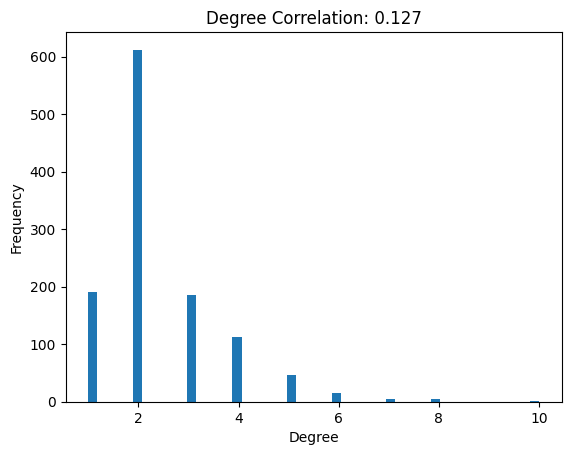

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2 = map(int, line.split())
        G.add_edge(node1, node2)

# Compute and plot degree correlation
degree_correlation = nx.degree_pearson_correlation_coefficient(G)
plt.hist(dict(G.degree()).values(), bins=50)
plt.title("Degree Correlation: {:.3f}".format(degree_correlation))
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


### Clustering metrics:
#### Clustering-degree correlation:

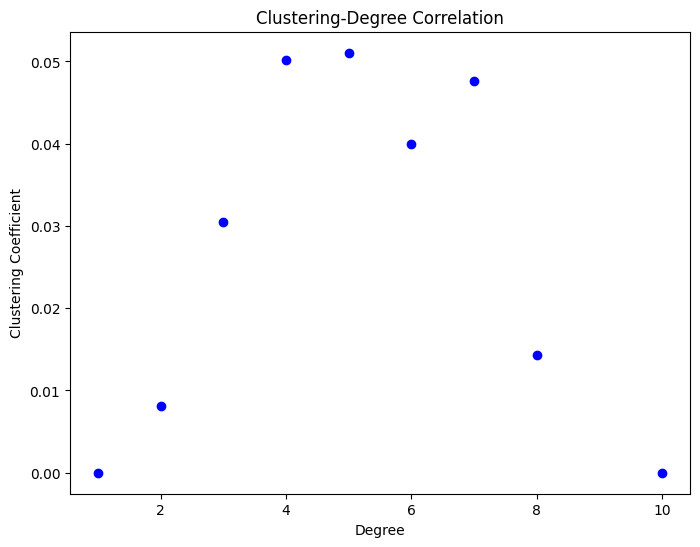

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2 = map(int, line.split())
        G.add_edge(node1, node2)

# Calculate clustering coefficient and degree for each node
clustering = nx.clustering(G)
degree = dict(G.degree())

# Group nodes by degree and calculate average clustering coefficient
degree_group = {}
for node, deg in degree.items():
    if deg not in degree_group:
        degree_group[deg] = [clustering[node]]
    else:
        degree_group[deg].append(clustering[node])

# Compute the mean clustering coefficient for each degree group
x = []
y = []
for deg, clustering_coeffs in degree_group.items():
    x.append(deg)
    y.append(sum(clustering_coeffs) / len(clustering_coeffs))

# Plot the result
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, color="blue")
ax.set_xlabel("Degree")
ax.set_ylabel("Clustering Coefficient")
ax.set_title("Clustering-Degree Correlation")
plt.show()


#### Clustering coefficient:

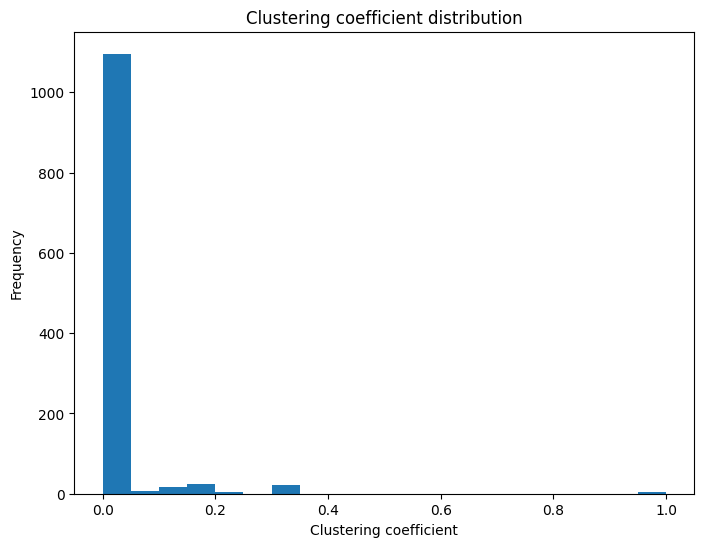

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2 = map(int, line.split())
        G.add_edge(node1, node2)

# Compute clustering coefficient
cc = nx.clustering(G)

# Plot degree distribution
plt.figure(figsize=(8, 6))
plt.hist(list(cc.values()), bins=20)
plt.xlabel("Clustering coefficient")
plt.ylabel("Frequency")
plt.title("Clustering coefficient distribution")
plt.show()


#### Assortativity metrics:

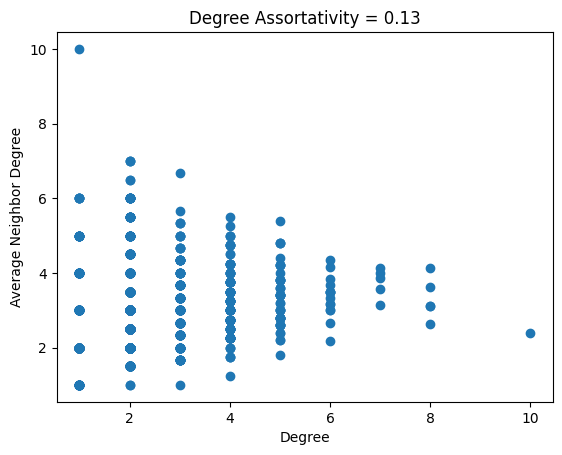

In [43]:
import networkx as nx
import matplotlib.pyplot as plt

# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2 = map(int, line.split())
        G.add_edge(node1, node2)

# Compute degree assortativity
degree_correlation = nx.degree_assortativity_coefficient(G)

# Compute average neighbor degree for each node
avg_neighbor_degrees = dict(nx.average_neighbor_degree(G))

# Create lists of degrees and corresponding average neighbor degrees for only nodes with both values
degrees = []
avg_degrees = []
for node, degree in dict(G.degree()).items():
    if node in avg_neighbor_degrees:
        degrees.append(degree)
        avg_degrees.append(avg_neighbor_degrees[node])

# Plot degree assortativity
plt.scatter(degrees, avg_degrees)
plt.xlabel("Degree")
plt.ylabel("Average Neighbor Degree")
plt.title(f"Degree Assortativity = {degree_correlation:.2f}")
plt.show()




## Topological Weighted (for edges) and Strength (for nodes):
### Weighted Network visualization:

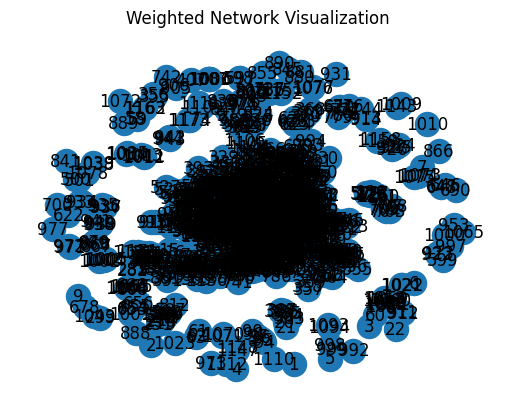

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2 = map(int, line.split())
        G.add_edge(node1, node2)

# Set edge weights based on the number of common digits in node1 and node2
for u, v, d in G.edges(data=True):
    common_digits = set(str(u)) & set(str(v))
    weight = len(common_digits)
    d["weight"] = weight

# Define layout
pos = nx.spring_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos)

# Draw edges with weights
weights = [d["weight"] for u, v, d in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=weights)

# Draw node labels
labels = {node: str(node) for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels)

# Set plot properties
plt.axis("off")
plt.title("Weighted Network Visualization")
plt.show()


### Average weight:

### Weight range:

### Centrality with:

### Weight clustering coefficient:

In [49]:
import networkx as nx
import matplotlib.pyplot as plt

# Read data from file
with open("../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for line in lines:
    if not line.startswith("%"):
        node1, node2, weight = map(int, line.split())
        G.add_edge(node1, node2, weight=weight)

# Compute the weighted clustering coefficient
wcc = nx.average_clustering(G, weight='weight')
print("Weighted clustering coefficient:", wcc)

# Plot the graph
nx.draw(G, with_labels=True)
plt.show()



ValueError: not enough values to unpack (expected 3, got 2)